In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cut_off_max = 600000  # removing when exceeding that value

In [3]:
df = pd.read_csv('./data/list_tags.csv')
df.head(100)

,tag,attr,attr_val,count
0,article,article-type,research-article,385174
1,article,article-type,review-article,19310
2,article,article-type,brief-report,4476
3,article,article-type,product-review,205
4,article,article-type,abstract,1100
...,...,...,...,...
95,article,id,ajmga62752,1
96,article,id,bjo16974,1
97,article,id,jcmm17348,1
98,article,id,acel13444,1


## Getting the total by tags


In [4]:
# Getting the total by tags
tags_sum = df.groupby('tag')['count'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
tags_sum = tags_sum[tags_sum['sum'] < cut_off_max]

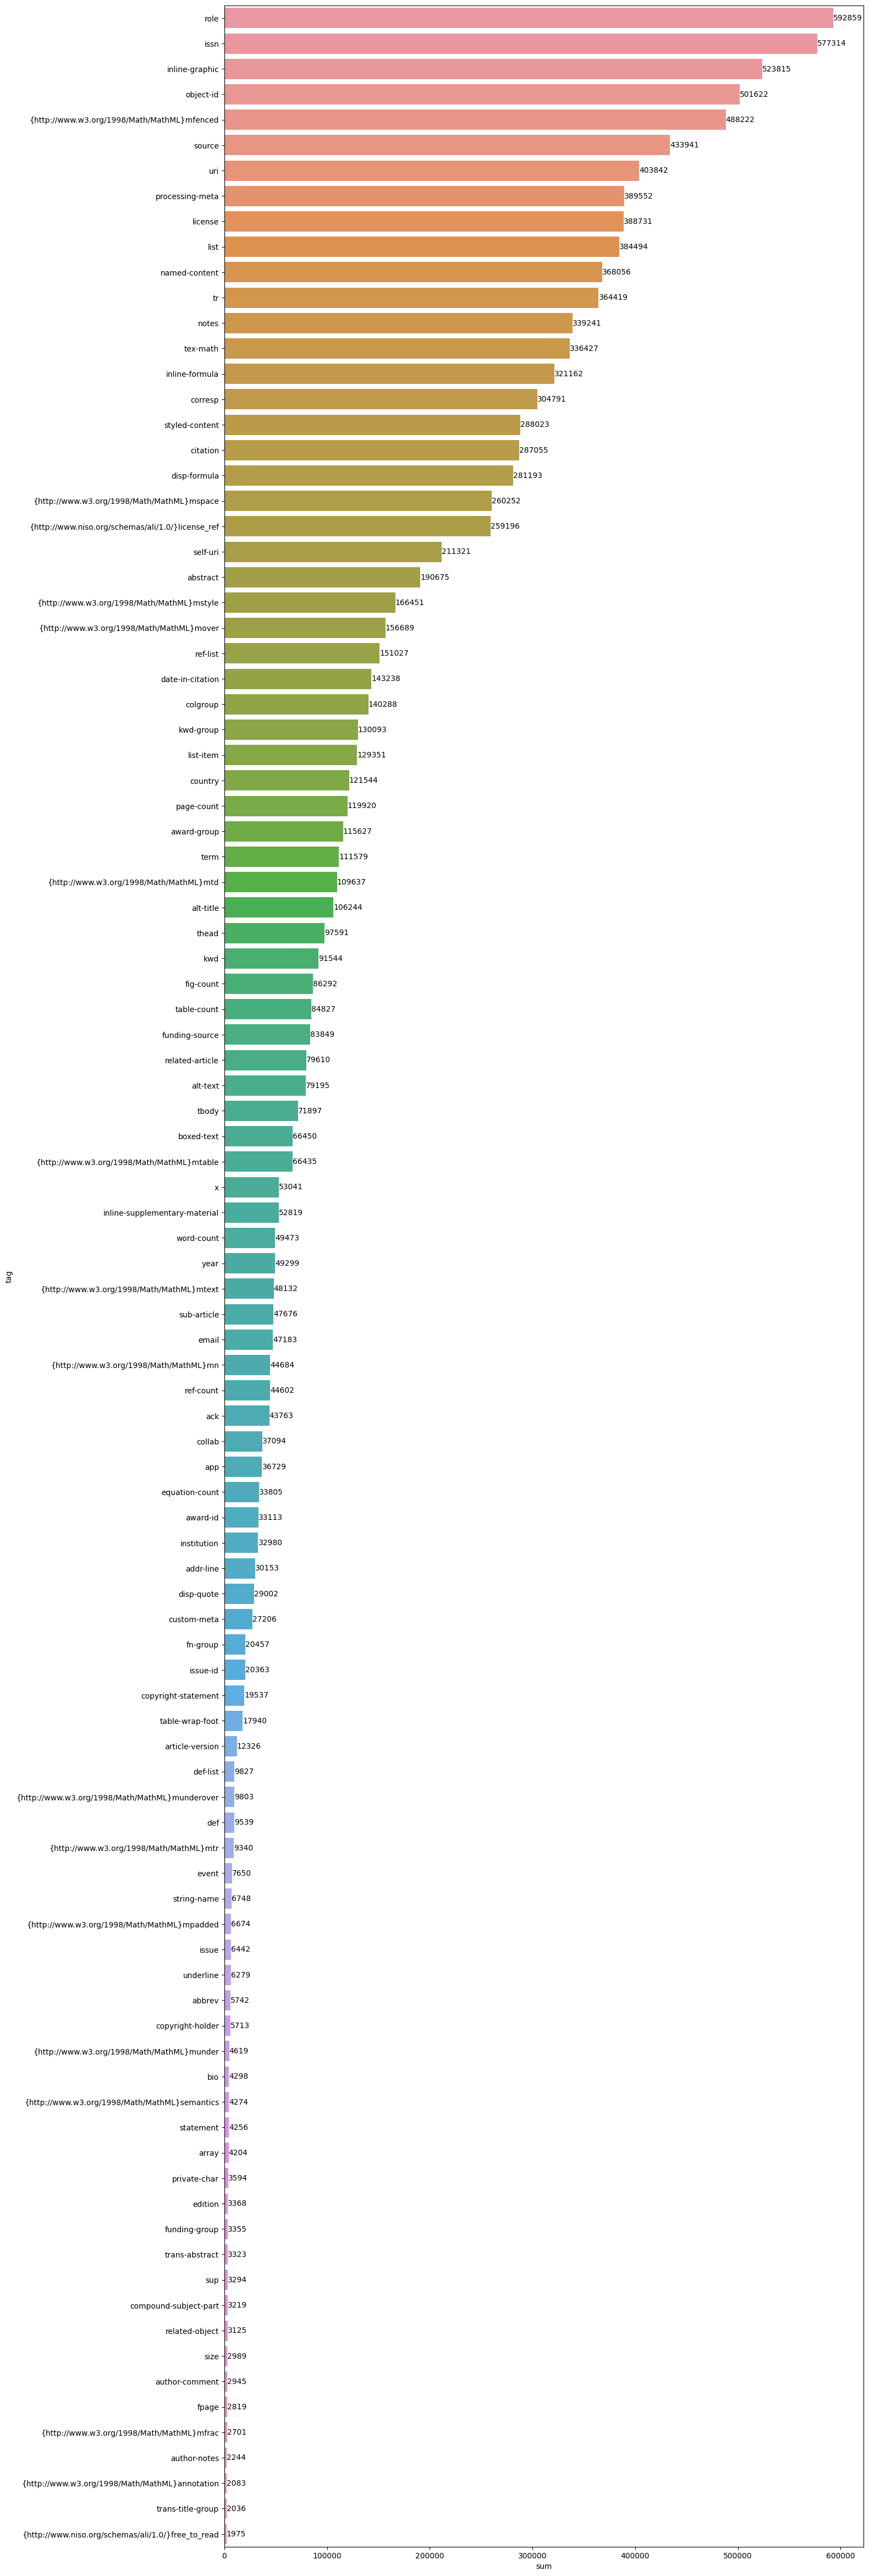

In [5]:
fig, ax = plt.subplots(figsize=(15,60))
ax = sns.barplot(y=tags_sum['tag'].head(100), x=tags_sum['sum'].head(100), orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Getting the total by Tag-Attribute

In [6]:
# Getting the total by tags-attribute
tags_attr_sum = df.groupby(['tag', 'attr'])['count'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
tags_attr_sum = tags_attr_sum[tags_attr_sum['sum'] < cut_off_max]
tags_attr_sum['tag-attr'] = tags_attr_sum['tag'] + '_' + tags_attr_sum['attr']

tags_attr_sum

,tag,attr,sum,tag-attr
413,supplementary-material,content-type,578988,supplementary-material_content-type
228,issn,pub-type,577309,issn_pub-type
414,supplementary-material,id,567123,supplementary-material_id
100,contrib,id,550357,contrib_id
199,graphic,position,527836,graphic_position
...,...,...,...,...
380,self-uri,specific-use,1,self-uri_specific-use
365,response,response-type,1,response_response-type
364,response,id,1,response_id
242,kwd-group,vocab-identifier,1,kwd-group_vocab-identifier


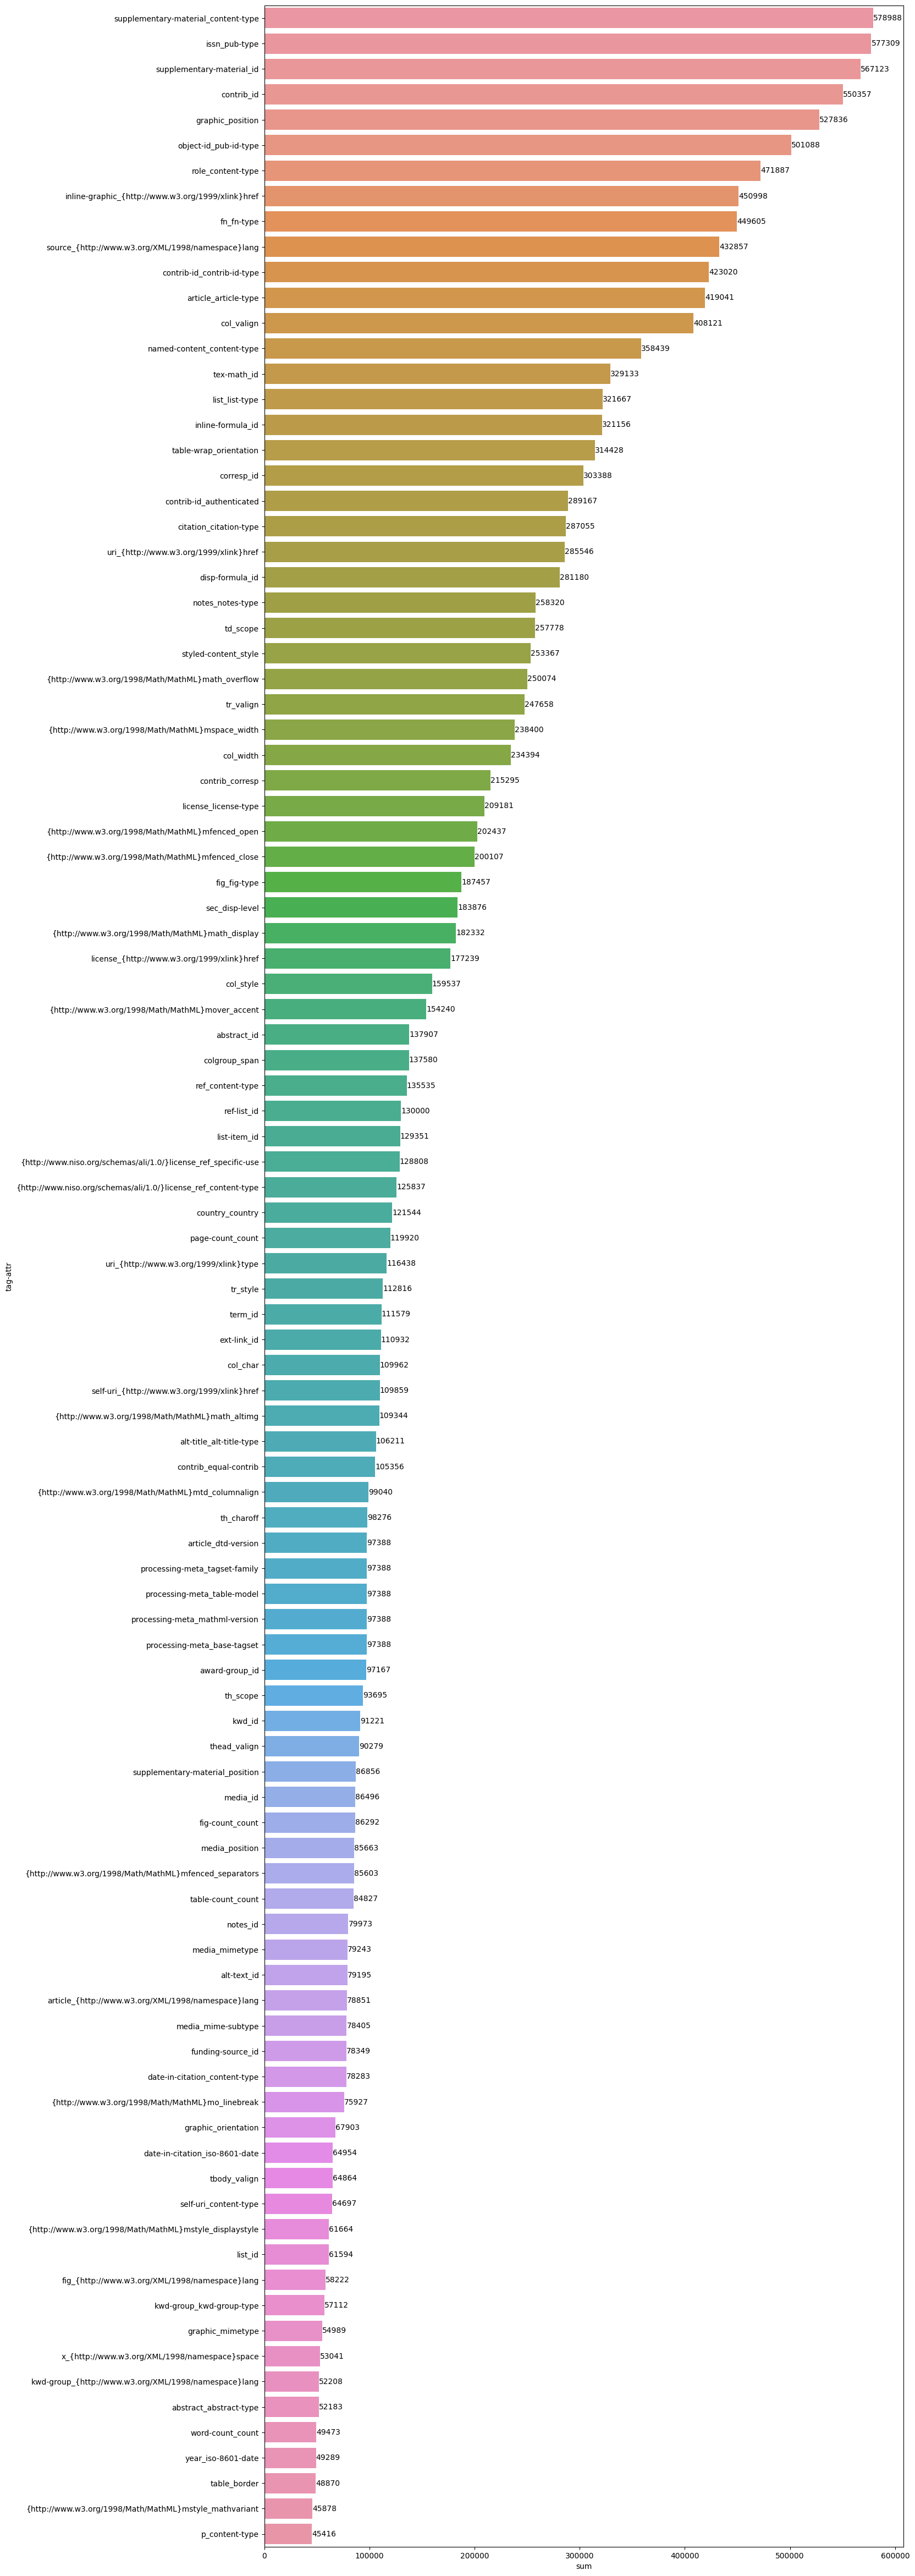

In [7]:
fig, ax = plt.subplots(figsize=(15,60))
ax = sns.barplot(y=tags_attr_sum['tag-attr'].head(100), x=tags_attr_sum['sum'].head(100), orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Getting the total by Attr Attr-Value

In [8]:
# Getting the total by tags-attribute
attr_attr_val_sum = df.groupby(['attr', 'attr_val'])['count'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
attr_attr_val_sum = attr_attr_val_sum[attr_attr_val_sum['sum'] < cut_off_max]
attr_attr_val_sum['attr-attr_val'] = attr_attr_val_sum['attr'] + '_' + attr_attr_val_sum['attr_val']
attr_attr_val_sum

,attr,attr_val,sum,attr-attr_val
7715,content-type,local-data,591115,content-type_local-data
20408444,stretchy,false,582983,stretchy_false
12069653,ref-type,media,564298,ref-type_media
20420313,style,border-top:solid thin;border-bottom:solid thin,526445,style_border-top:solid thin;border-bottom:soli...
12050819,mathvariant,normal,511324,mathvariant_normal
...,...,...,...,...
8841473,id,pone.0059368-Levi2,1,id_pone.0059368-Levi2
8841472,id,pone.0059368-Levi1,1,id_pone.0059368-Levi1
8841471,id,pone.0059368-Leslie1,1,id_pone.0059368-Leslie1
8841470,id,pone.0059368-Leemann1,1,id_pone.0059368-Leemann1


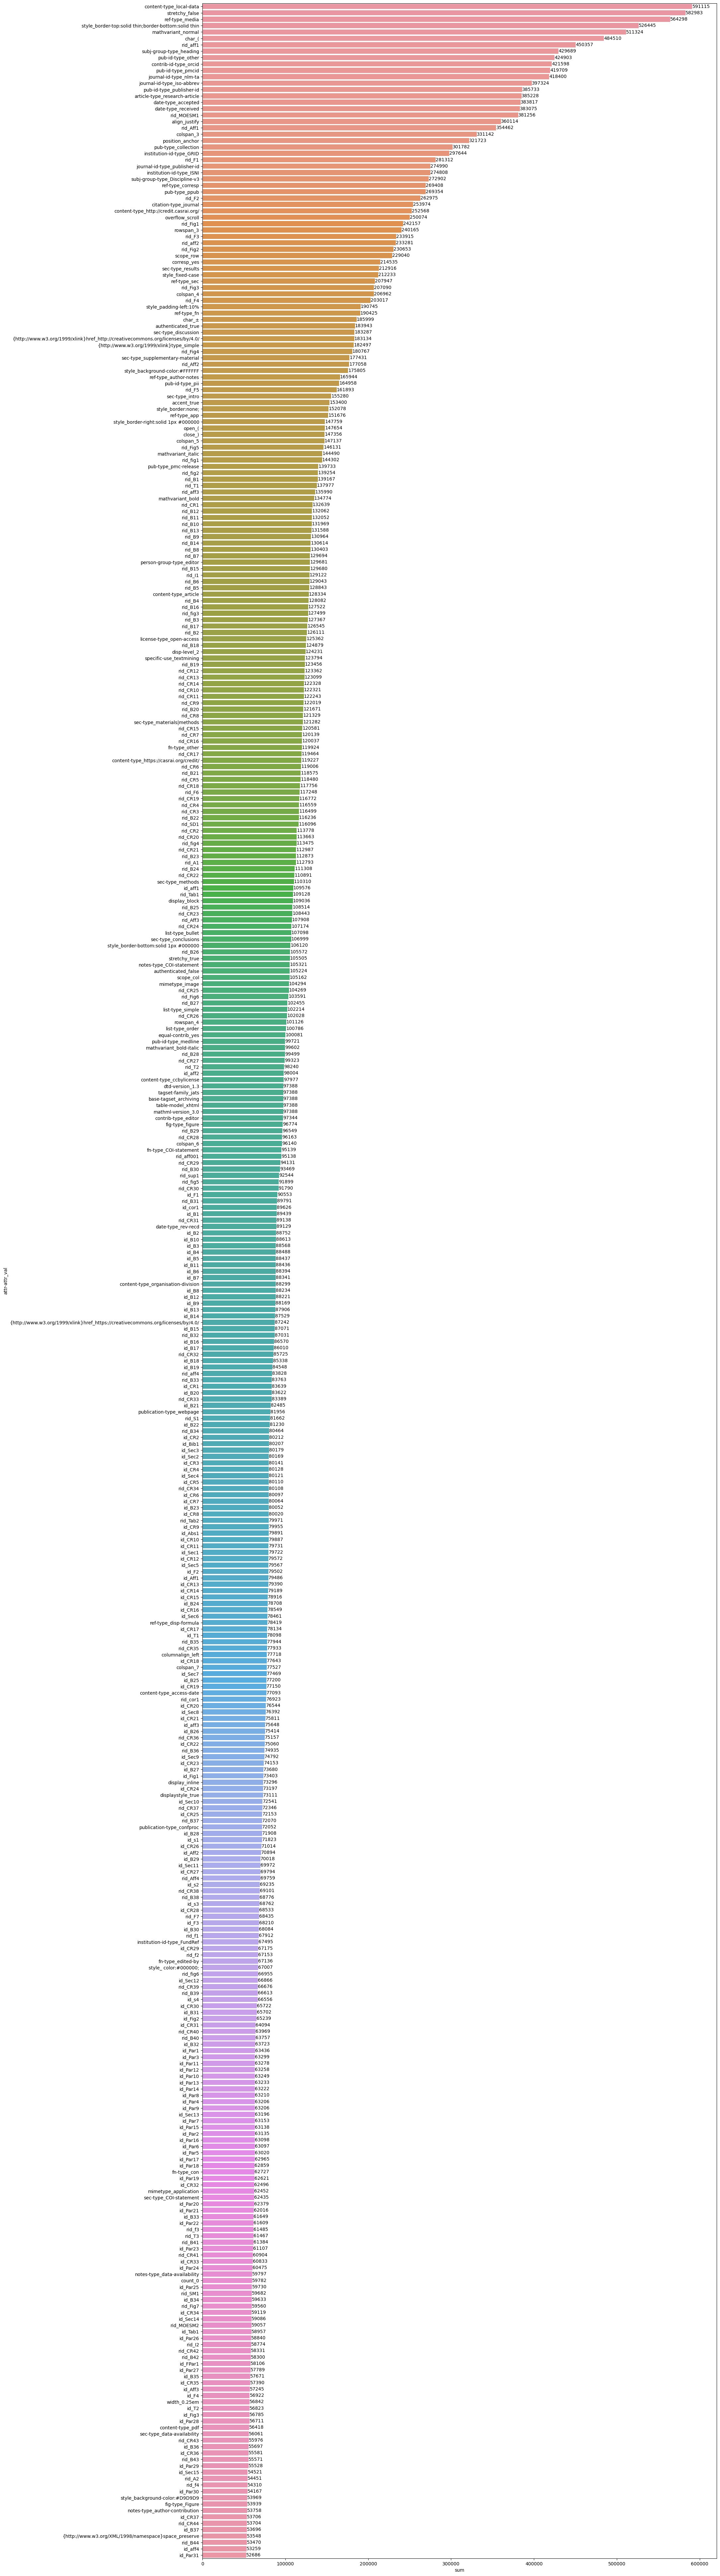

In [9]:
fig, ax = plt.subplots(figsize=(20,100))
ax = sns.barplot(y=attr_attr_val_sum['attr-attr_val'].head(400), x=attr_attr_val_sum['sum'].head(400), orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Showing the different types of section

In [10]:
# Getting the total by tags-attribute
sec_type_sum = df[df['attr'] == 'sec-type'].groupby(['attr', 'attr_val'])['count'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
sec_type_sum = sec_type_sum[sec_type_sum['sum'] < cut_off_max]
sec_type_sum['attr-attr_val'] = sec_type_sum['attr'] + '_' + sec_type_sum['attr_val']
sec_type_sum

,attr,attr_val,sum,attr-attr_val
1063,sec-type,results,212916,sec-type_results
710,sec-type,discussion,183287,sec-type_discussion
1157,sec-type,supplementary-material,177431,sec-type_supplementary-material
834,sec-type,intro,155280,sec-type_intro
901,sec-type,materials|methods,121282,sec-type_materials|methods
...,...,...,...,...
509,sec-type,acupuncture treatment in patients with ischemi...,1,sec-type_acupuncture treatment in patients wit...
510,sec-type,adaptive response induced by lipid peroxidatio...,1,sec-type_adaptive response induced by lipid pe...
513,sec-type,affiliation,1,sec-type_affiliation
514,sec-type,affiliations,1,sec-type_affiliations


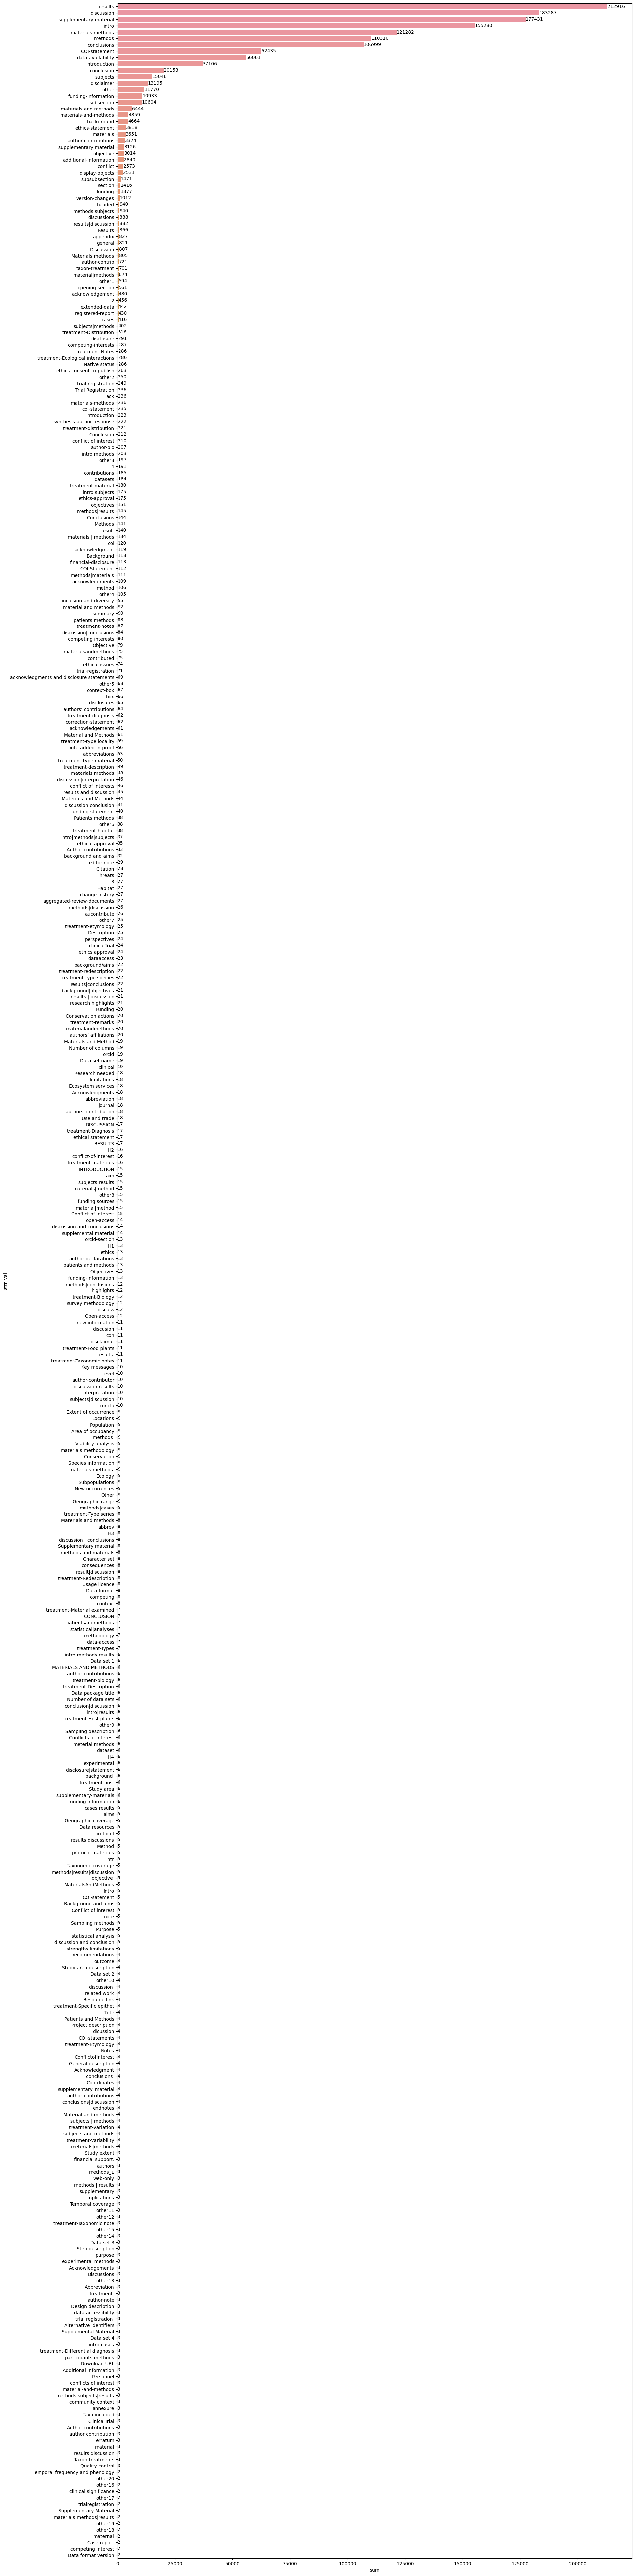

In [11]:
fig, ax = plt.subplots(figsize=(20,100))
ax = sns.barplot(y=sec_type_sum['attr_val'].head(400), x=sec_type_sum['sum'].head(400), orient='h')
ax.bar_label(ax.containers[0])
plt.show()